### Nama: Gabriella Caesaria Vianney
### NIM: 2209106007
### Kelas: Praktikum KB A1 2022
## POSTTEST 6

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [264]:
gaby = pd.read_csv('cleaned_all_phones.csv')
gaby.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [265]:
gaby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

### CEK NILAI NULL PADA DATA

In [266]:
gaby.isna().sum()

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64

### CEK NILAI DUPLIKAT PADA DATA

In [267]:
gaby.duplicated().sum()

0

### MENGUBAH DATA KATEGORI MENJADI NUMERIK

In [268]:
label_encoder = LabelEncoder()

for column in gaby.columns:
    if gaby[column].dtype == 'object':
        gaby[column] = label_encoder.fit_transform(gaby[column])

In [269]:
gaby.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,1238,3,8,5.0,71,2200,1,2,0,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,582,4,12,5.3,71,2700,0,2,1,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,788,3,12,5.2,0,3000,0,4,2,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,1017,12,10,5.5,0,4100,1,4,2,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,769,3,12,5.1,0,3200,0,4,3,145.0,...,True,True,False,True,True,False,False,False,False,420.0


### MELAKUKAN ONE HOT ENCODER PADA KOLOM TARGET

In [270]:
encoder = OneHotEncoder(sparse_output=False)

categories = ["brand", "battery_type"]
gaby_categorical = encoder.fit_transform(gaby[categories])
categorical = encoder.get_feature_names_out(categories)
gaby_categorical = pd.DataFrame(gaby_categorical, columns=categorical)

gaby_categorical.head()

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11,brand_12,battery_type_0,battery_type_1
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [271]:
gaby = pd.concat([gaby, gaby_categorical], axis=1)
gaby.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11,brand_12,battery_type_0,battery_type_1
0,1238,3,8,5.0,71,2200,1,2,0,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,582,4,12,5.3,71,2700,0,2,1,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,788,3,12,5.2,0,3000,0,4,2,147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1017,12,10,5.5,0,4100,1,4,2,165.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,769,3,12,5.1,0,3200,0,4,3,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### SPLIT DATA

In [272]:
X = gaby['brand_3'] 
y = gaby['battery_type_0']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SEQUENTIAL MODEL

In [274]:
model = Sequential([
    layers.Dense(128, activation='relu', input_shape=[1]),
    layers.Dense(50, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [275]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               256       
                                                                 
 dense_53 (Dense)            (None, 50)                6450      
                                                                 
 dense_54 (Dense)            (None, 30)                1530      
                                                                 
 dense_55 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8267 (32.29 KB)
Trainable params: 8267 (32.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### TRAINING MODEL

In [278]:
fitting=model.fit(X_train,y_train, epochs=100 ,validation_split =0.2,batch_size=32)

Epoch 1/100
31/31 [==============================] - 0s 6ms/step - loss: 0.4813 - accuracy: 0.8139 - val_loss: 0.4496 - val_accuracy: 0.8347
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.8139 - val_loss: 0.4468 - val_accuracy: 0.8347
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.4835 - accuracy: 0.8139 - val_loss: 0.4500 - val_accuracy: 0.8347
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 0.8139 - val_loss: 0.4485 - val_accuracy: 0.8347
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.8139 - val_loss: 0.4497 - val_accuracy: 0.8347
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.8139 - val_loss: 0.4475 - val_accuracy: 0.8347
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.4809 - accuracy: 0.8139 - val_loss: 0.4484 - val_accuracy: 0.8347
Epoch 8/100
3

In [279]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Akurasi:", accuracy)

10/10 [==============================] - 0s 2ms/step
Akurasi: 0.834983498349835


#### Hasil diatas menujukkan akurasi tertinggi pada training model mencapai 0.834983498349835 (atau sekitar 83.5%) mengindikasikan bahwa model telah berhasil memprediksi data dengan akurasi sekitar 83.5% yang dapat dianggap sebagai hasil yang baik

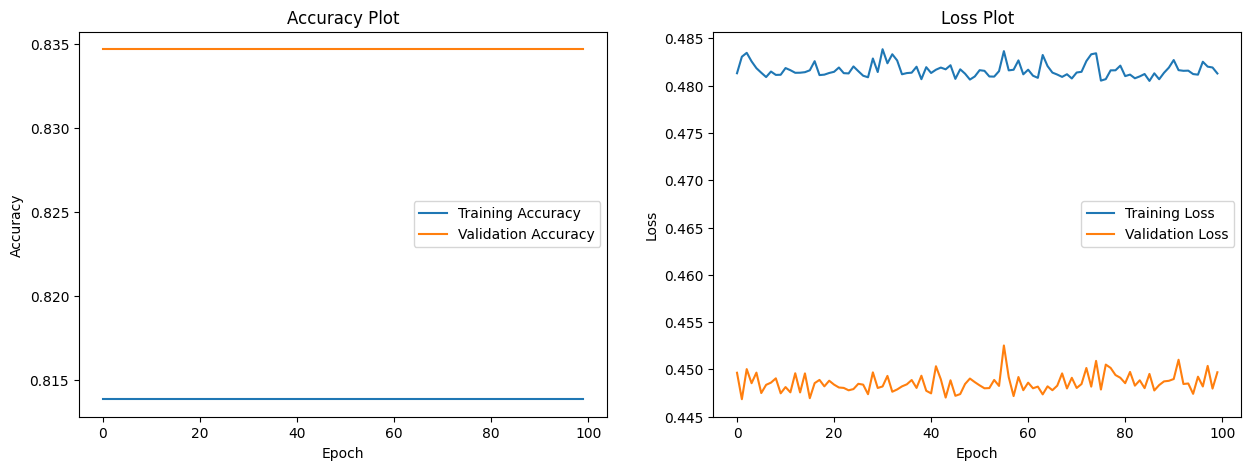

In [282]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(fitting.history['accuracy'], label='Training Accuracy')
plt.plot(fitting.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fitting.history['loss'], label='Training Loss')
plt.plot(fitting.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()